In [1]:
import os
import numpy as np
import cv2
import glob
import matplotlib
matplotlib.use('qt5agg')
import matplotlib.pyplot as plt

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

for ny in [5,6]:
    for nx in [6,7,8,9]:

        # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
        objp = np.zeros((ny*nx,3), np.float32)
        objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

        # Make a list of calibration images
        images = glob.glob('camera_cal/calibration*.jpg')
        out_dir='output_images/stage_0_0_corners_found/'

        # Step through the list and search for chessboard corners
        for idx, fname in enumerate(images):
            img = cv2.imread(fname)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Find the chessboard corners
            ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

            # If found, add object points, image points
            if ret == True:
                objpoints.append(objp)
                imgpoints.append(corners)


                # Draw and display the corners
                cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
                image_name=os.path.split(fname)[1]
                write_name = out_dir+'corners_found_ny'+str(ny)+'_nx'+str(nx)+'_'+image_name
                cv2.imwrite(write_name, img)
                print(fname)
                cv2.imshow('img', img)
                cv2.waitKey(500)
    cv2.destroyAllWindows()

camera_cal/calibration15.jpg
camera_cal/calibration4.jpg
camera_cal/calibration5.jpg
camera_cal/calibration1.jpg
camera_cal/calibration15.jpg
camera_cal/calibration5.jpg
camera_cal/calibration14.jpg
camera_cal/calibration2.jpg
camera_cal/calibration7.jpg
camera_cal/calibration6.jpg
camera_cal/calibration17.jpg
camera_cal/calibration8.jpg
camera_cal/calibration20.jpg
camera_cal/calibration14.jpg
camera_cal/calibration18.jpg
camera_cal/calibration3.jpg
camera_cal/calibration15.jpg
camera_cal/calibration2.jpg
camera_cal/calibration9.jpg
camera_cal/calibration19.jpg
camera_cal/calibration12.jpg
camera_cal/calibration13.jpg
camera_cal/calibration16.jpg
camera_cal/calibration11.jpg
camera_cal/calibration10.jpg


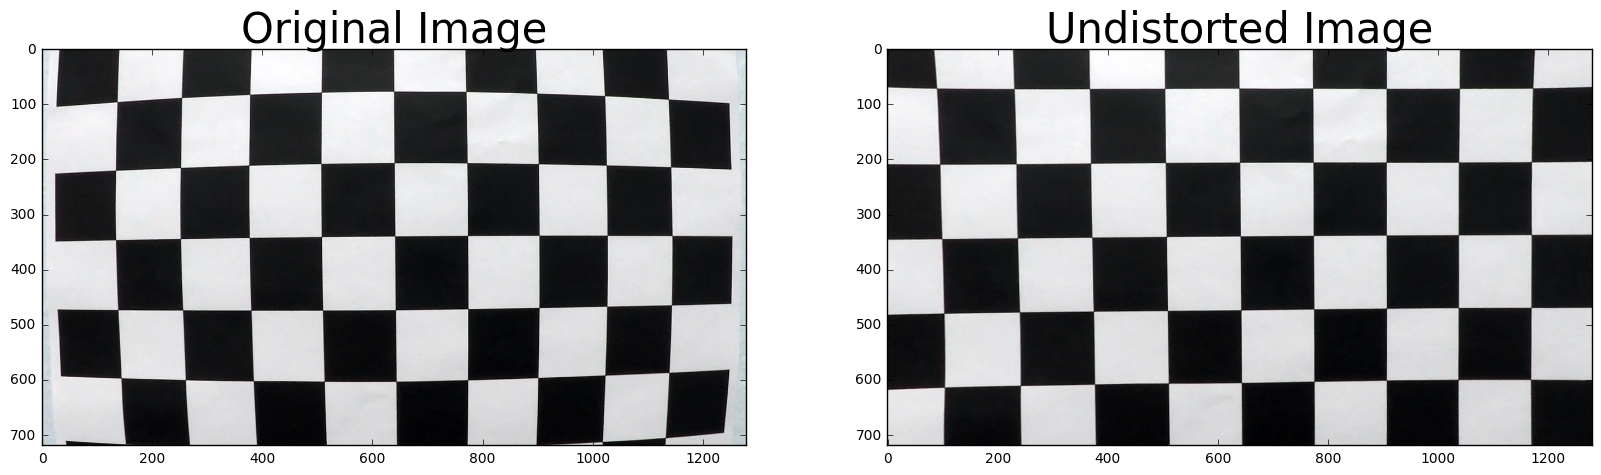

In [2]:
%matplotlib inline

# Test undistortion on an image
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
dst = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [5]:
import pickle
# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_dist_pickle.p", "wb" ) )

# Visualize undistortion
out_dir='output_images/stage_0_1_undistorted_images/'
# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    image_name=os.path.split(fname)[1]
    write_name = out_dir+'undistorted_'+image_name
    cv2.imwrite(write_name,dst)
    print(write_name)
    cv2.imshow('dst', dst)
    cv2.waitKey(500)
cv2.destroyAllWindows()

output_images/stage_0_1_undistorted_images/undistorted_calibration7.jpg
output_images/stage_0_1_undistorted_images/undistorted_calibration6.jpg
output_images/stage_0_1_undistorted_images/undistorted_calibration17.jpg
output_images/stage_0_1_undistorted_images/undistorted_calibration8.jpg
output_images/stage_0_1_undistorted_images/undistorted_calibration20.jpg
output_images/stage_0_1_undistorted_images/undistorted_calibration14.jpg
output_images/stage_0_1_undistorted_images/undistorted_calibration18.jpg
output_images/stage_0_1_undistorted_images/undistorted_calibration3.jpg
output_images/stage_0_1_undistorted_images/undistorted_calibration15.jpg
output_images/stage_0_1_undistorted_images/undistorted_calibration2.jpg
output_images/stage_0_1_undistorted_images/undistorted_calibration9.jpg
output_images/stage_0_1_undistorted_images/undistorted_calibration1.jpg
output_images/stage_0_1_undistorted_images/undistorted_calibration19.jpg
output_images/stage_0_1_undistorted_images/undistorted_cal

In [14]:
import cv2
import imageio
imageio.plugins.ffmpeg.download()

In [13]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import pickle

# load pickled distortion matrix
with open('camera_dist_pickle.p', mode='rb') as f:
    dist_pickle = pickle.load(f)
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]

In [16]:
def process_image(image):
    result = cv2.undistort(image, mtx, dist, None, mtx)
    return result

output = 'stage0_calibrated_project_video.mp4'
clip = VideoFileClip("project_video.mp4")
calibrated_clip = clip.fl_image(process_image) #NOTE: this function expects color images!!
%time calibrated_clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video calibrated_project_video.mp4
[MoviePy] Writing video calibrated_project_video.mp4


100%|█████████▉| 1260/1261 [00:37<00:00, 33.87it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: calibrated_project_video.mp4 

CPU times: user 35.2 s, sys: 1.34 s, total: 36.5 s
Wall time: 37.6 s
